## Goal of this project:
    
Given a sample of MTA turnstile data, we are challenged to determine the busiest station districts in New York City.    

## Setup

Data manipulation libraries:

In [3]:
import numpy  as np
import pandas as pd

Visualization libraries:

In [4]:
import matplotlib.pyplot  as plt
import seaborn            as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

Storage libraries:

In [5]:
from sqlalchemy import create_engine

## Data-set

In [42]:
MTA_daily = pd.read_csv('mta_daily.csv')

In [43]:
MTA_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,09/02/2018,2286148,6744555,09/02/2018,6744471.0,2286100.0,84.0,48.0
1,A002,R051,02-00-00,59 ST,09/02/2018,2286202,6744719,09/02/2018,6744555.0,2286148.0,164.0,54.0
2,A002,R051,02-00-00,59 ST,09/02/2018,2286237,6744871,09/02/2018,6744719.0,2286202.0,152.0,35.0
3,A002,R051,02-00-00,59 ST,09/05/2018,2287150,6746909,09/02/2018,6744871.0,2286237.0,2038.0,913.0
4,A002,R051,02-00-00,59 ST,09/05/2018,2287385,6747060,09/05/2018,6746909.0,2287150.0,151.0,235.0


In [44]:
MTA_daily.describe()

,EXITS,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
count,2.699557e+06,2.699557e+06,2.699557e+06,2.699557e+06,2.699557e+06,2.699557e+06
mean,6.729354e+06,1.021804e+07,1.021700e+07,6.728450e+06,6.111034e+02,4.034308e+02
std,3.374756e+07,4.034922e+07,4.034314e+07,3.374242e+07,5.122055e+04,3.072611e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.854950e+05,6.758110e+05,6.757820e+05,3.854700e+05,2.400000e+01,2.000000e+01
50%,1.639744e+06,2.741674e+06,2.741627e+06,1.639698e+06,1.020000e+02,7.000000e+01
75%,4.820774e+06,6.734915e+06,6.734794e+06,4.820646e+06,2.780000e+02,1.930000e+02
max,5.886257e+08,6.442641e+08,6.442630e+08,5.886256e+08,1.583178e+07,1.124244e+07


## Feature Engineering

Add new column represent traffic

In [45]:
MTA_daily['turn_traffic']= MTA_daily.DAILY_ENTRIES + MTA_daily.DAILY_EXITS

## Top 30 Stations in Traffic

In [46]:
stations_totals = MTA_daily.groupby('STATION', as_index=False).turn_traffic.sum()
stations_totals.rename(columns={'turn_traffic':'total_st_traffic'}, inplace=True)
stations_totals.sort_values(by='total_st_traffic', ascending=False, inplace=True)

In [55]:
stations_totals.head()

,STATION,total_st_traffic
91,67 AV,141332995.0
257,JOURNAL SQUARE,138807145.0
61,34 ST-PENN STA,112045681.0
51,25 ST,99585672.0
190,CORTELYOU RD,71232960.0


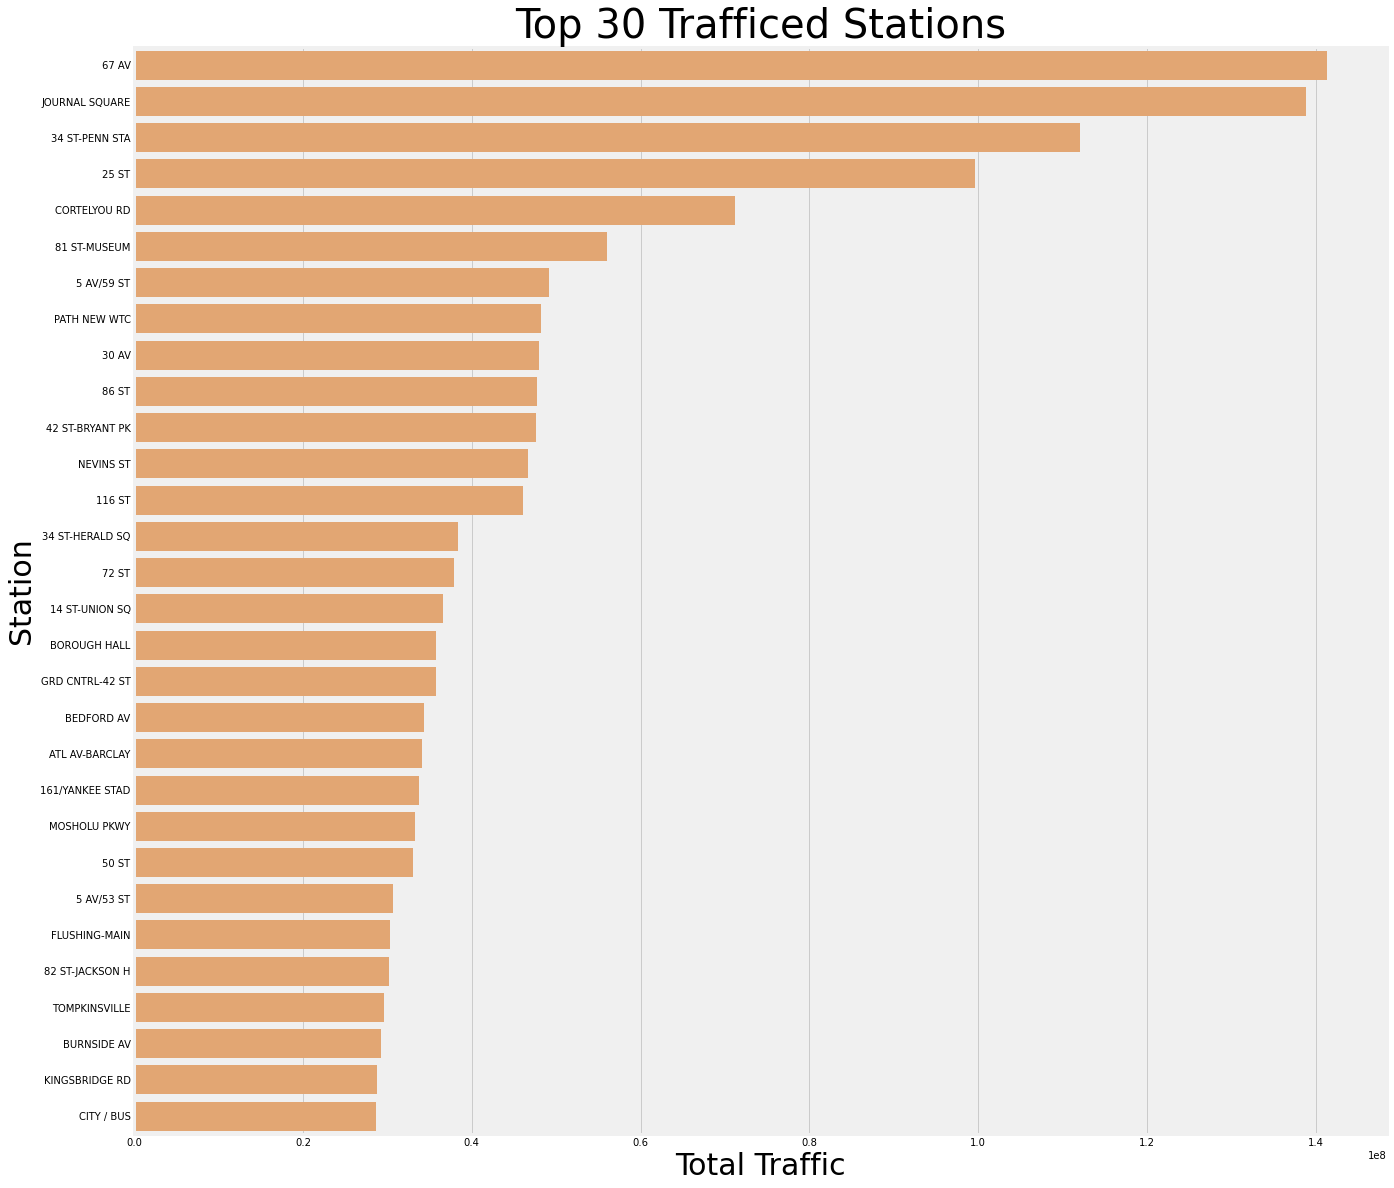

In [66]:
plt.figure(figsize=[20,20])
sns.barplot(x='total_st_traffic', y='STATION', data=stations_totals[:30], color='sandybrown')
plt.title('Top 30 Trafficed Stations', fontsize=40)
plt.xlabel('Total Traffic', fontsize=30)
plt.ylabel('Station', fontsize=30);
plt.savefig('TOP-30.png')

### Create new DF to locate the busiest stations

In [154]:
Top_30_ST = stations_totals[['STATION', 'total_st_traffic']]

Top_30_ST = Top_30_ST.drop_duplicates()

Top_30_ST.sort_values(by='total_st_traffic', ascending=False, inplace=True)

Top_30_ST = pd.DataFrame(stations_totals[:30])

Top_30_ST.head()

,STATION,total_st_traffic
91,67 AV,141332995.0
257,JOURNAL SQUARE,138807145.0
61,34 ST-PENN STA,112045681.0
51,25 ST,99585672.0
190,CORTELYOU RD,71232960.0


### Determine the Stations for each District

In [155]:
Manhatten_Stations = ['34 ST-PENN STA', '25 ST', '5 AV/59 ST', '86 ST', 'PATH NEW WTC', '42 ST-BRYANT PK',
                      '30 AV', '72 ST', '34 ST-HERALD SQ', 'GRD CNTRL-42 ST', '14 ST-UNION SQ', 'BOROUGH HALL',
                      '161/YANKEE STAD', 'BEDFORD AV', 'ATL AV-BARCLAY','MOSHOLU PKWY','TOMPKINSVILLE','BURNSIDE AV']

In [156]:
Brooklyn_Stations  = ['CORTELYOU RD', '81 ST-MUSEUM', '116 ST', '50 ST', 'FLUSHING-MAIN','82 ST-JACKSON H']

In [157]:
Queens_Stations    = ['67 AV', 'NEVINS ST', 'KINGSBRIDGE RD']

In [158]:
Bronx_Stations     = ['5 AV/53 ST', '23 ST']

In [162]:
def extractDstrict(x):
    if x in  Bronx_Stations:
        return 'Bronx'
              
    elif x in Queens_Stations :
        return 'Queens' 
        
    elif x in Brooklyn_Stations:
        return'Brooklyn'
        
    elif x in Manhatten_Stations :
        return'Manhatten'   
    
    else:
        return 'New Jersey'

In [163]:
Top_30_ST['District'] = Top_30_ST['STATION'].apply(lambda x : extractDstrict(x))

In [164]:
Top_30_ST

,STATION,total_st_traffic,District
91,67 AV,141332995.0,Queens
257,JOURNAL SQUARE,138807145.0,New Jersey
61,34 ST-PENN STA,112045681.0,Manhatten
51,25 ST,99585672.0,Manhatten
190,CORTELYOU RD,71232960.0,Brooklyn
106,81 ST-MUSEUM,55972121.0,Brooklyn
75,5 AV/59 ST,49093997.0,Manhatten
314,PATH NEW WTC,48206375.0,Manhatten
56,30 AV,47960548.0,Manhatten
109,86 ST,47765396.0,Manhatten


### Districts Frequency

In [165]:
freq_table = pd.DataFrame(Top_30_ST.loc[:, "District"].value_counts())
freq_table.columns = ["Frequency"]
freq_table

,Frequency
Manhatten,18
Brooklyn,6
Queens,3
New Jersey,2
Bronx,1


In [166]:
freq_table["RelativeFrequency"] = freq_table["Frequency"] / freq_table.Frequency.sum() #(f/sum of f )=R.f
freq_table

,Frequency,RelativeFrequency
Manhatten,18,0.600000
Brooklyn,6,0.200000
Queens,3,0.100000
New Jersey,2,0.066667
Bronx,1,0.033333


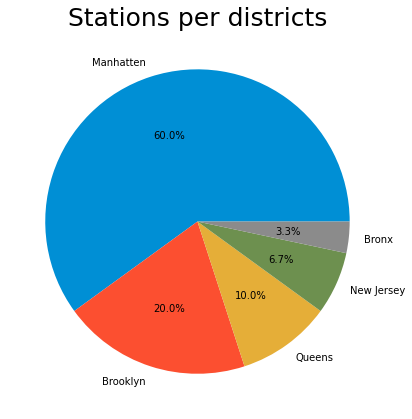

In [172]:
plt.figure(figsize = [7,7])
plt.title('Stations per districts', fontsize=25)
plt.pie(freq_table.RelativeFrequency, labels=freq_table.index,autopct='%1.1f%%');
plt.savefig('Districts_percentage.png')

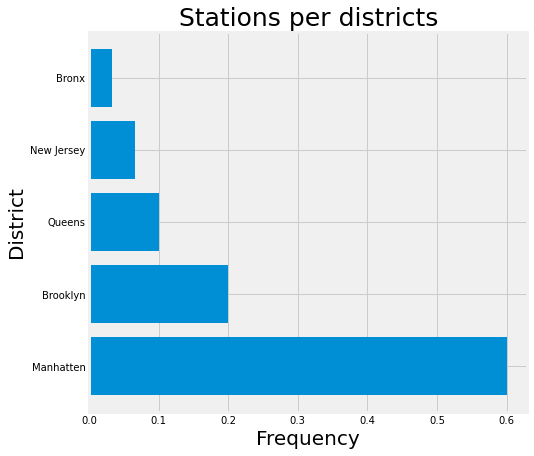

In [173]:
plt.figure(figsize = [7,7])
plt.title('Stations per districts', fontsize=25)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('District', fontsize=20);
plt.barh(freq_table.index,freq_table.RelativeFrequency);
plt.savefig('District_frequency.png')

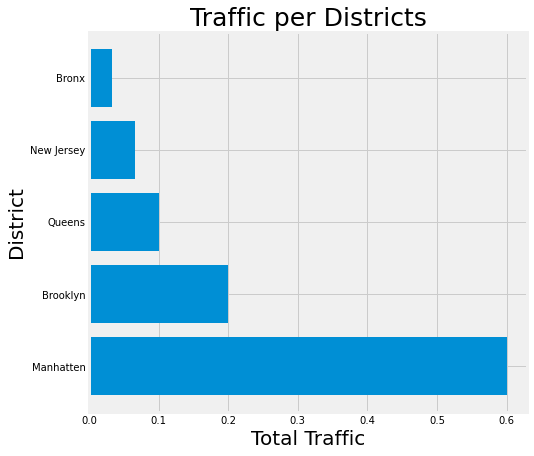

In [178]:
plt.figure(figsize = [7,7])
plt.title('Traffic per Districts', fontsize=25)
plt.xlabel('Total Traffic', fontsize=20)
plt.ylabel('District', fontsize=20);
plt.barh(freq_table.index,freq_table.RelativeFrequency);
plt.savefig('District_Traffic.png')

## Top 10 Stations in Traffic

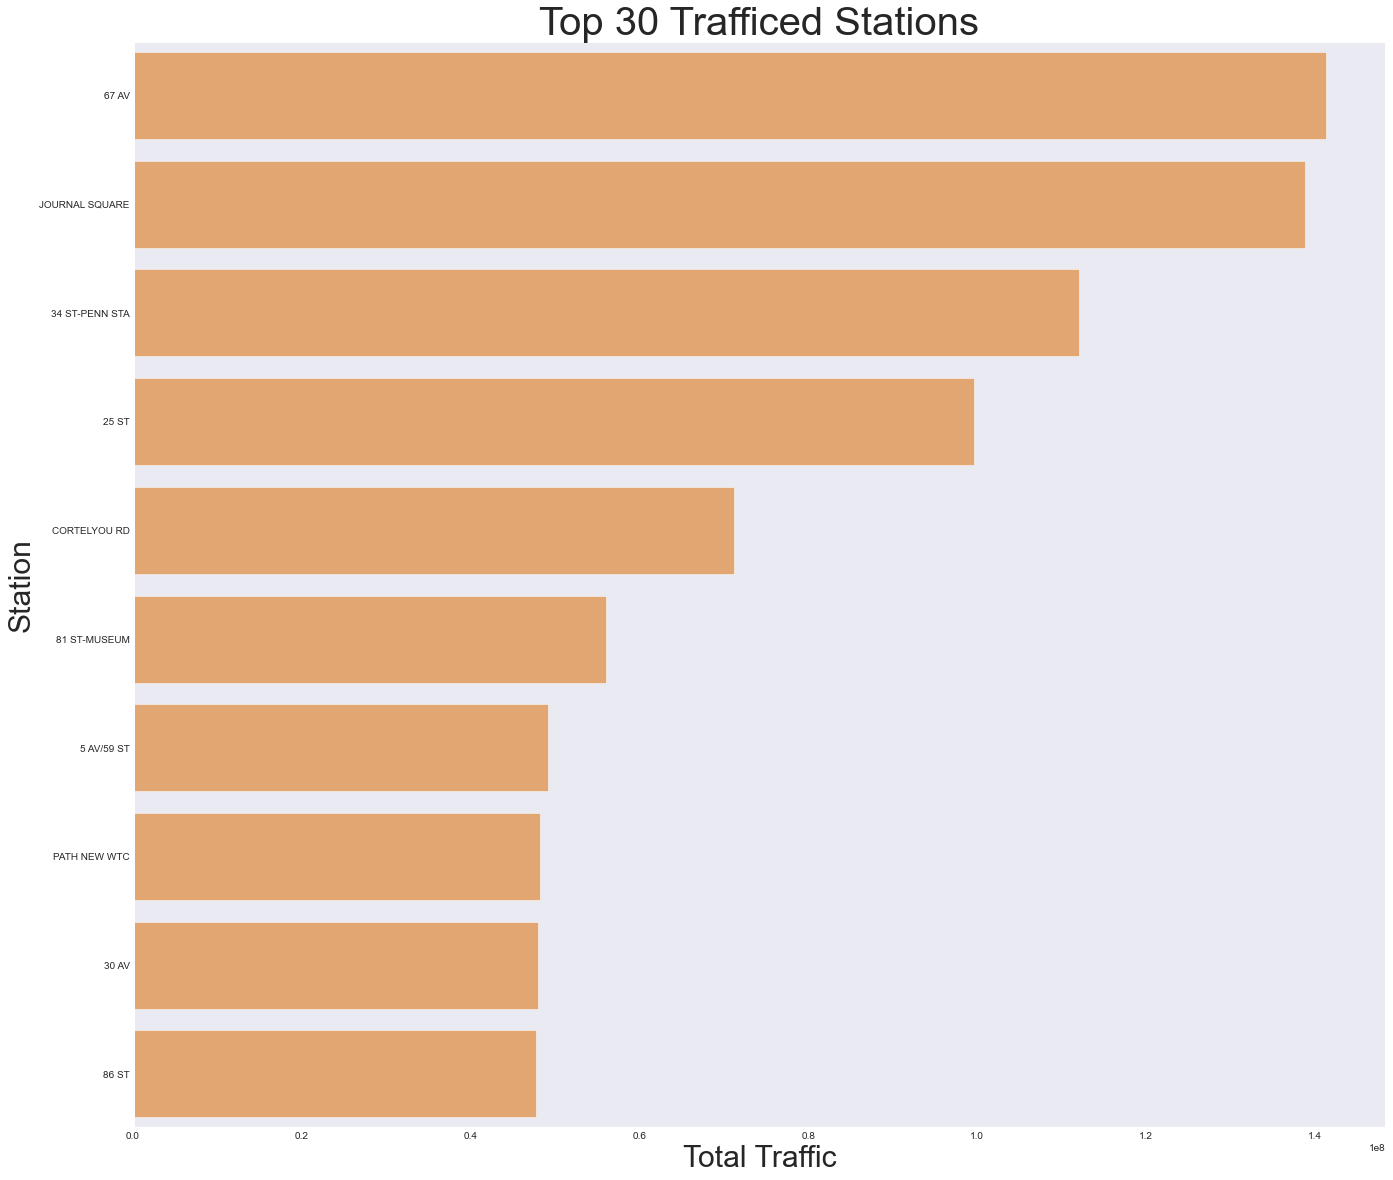

In [197]:
plt.figure(figsize=[20,20])
sns.barplot(x='total_st_traffic', y='STATION', data=stations_totals[:10], color='sandybrown')
plt.title('Top 30 Trafficed Stations', fontsize=40)
plt.xlabel('Total Traffic', fontsize=30)
plt.ylabel('Station', fontsize=30);
plt.savefig('TOP-10.png')

## Traffic Per Days

In [179]:
#Assume focus on top ten total traffic
n=10

#increase to top 10
s = [each for _, each in stations_totals[:n]['STATION'].items()]

In [181]:
top_10 = pd.DataFrame(MTA_daily[MTA_daily.STATION.isin(s)])

## Feature Engeeniring 

Adding day per week column. 

In [183]:
MTA_daily['day_of_week'] = pd.to_datetime(MTA_daily['DATE']).dt.dayofweek

Determine Daily Cumulative traffic by day of week.

In [198]:
daily_df = MTA_daily[MTA_daily.STATION.isin(s[:n])].groupby(['STATION','day_of_week'], as_index=False).turn_traffic.sum()

Rename 'turn_traffic' to be 'daily_traffic'

In [199]:
daily_df.rename(columns={'turn_traffic':'daily_traffic'}, inplace=True)

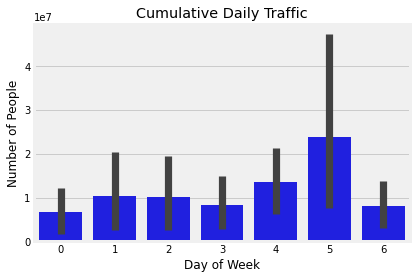

In [186]:
sns.barplot(x='day_of_week', y='daily_traffic', data=daily_df, color='b')
plt.xlabel('Day of Week')
plt.ylabel('Number of People')
plt.title('Cumulative Daily Traffic');
plt.savefig('Cumulative Daily Traffic')

#### New DF for Weekday

In [187]:
wkday_df = pd.DataFrame(MTA_daily[MTA_daily.day_of_week < 5])

In [188]:
wkday_rank = wkday_df.groupby(['STATION'], as_index=False).turn_traffic.sum()
wkday_rank.sort_values('turn_traffic', ascending=False, inplace=True)
wkday_rank.head(10)

,STATION,turn_traffic
257,JOURNAL SQUARE,102616391.0
51,25 ST,99441152.0
61,34 ST-PENN STA,95657471.0
75,5 AV/59 ST,48031156.0
66,42 ST-BRYANT PK,46547006.0
314,PATH NEW WTC,39501090.0
106,81 ST-MUSEUM,37791795.0
96,72 ST,36081434.0
155,BOROUGH HALL,34995170.0
109,86 ST,34296010.0


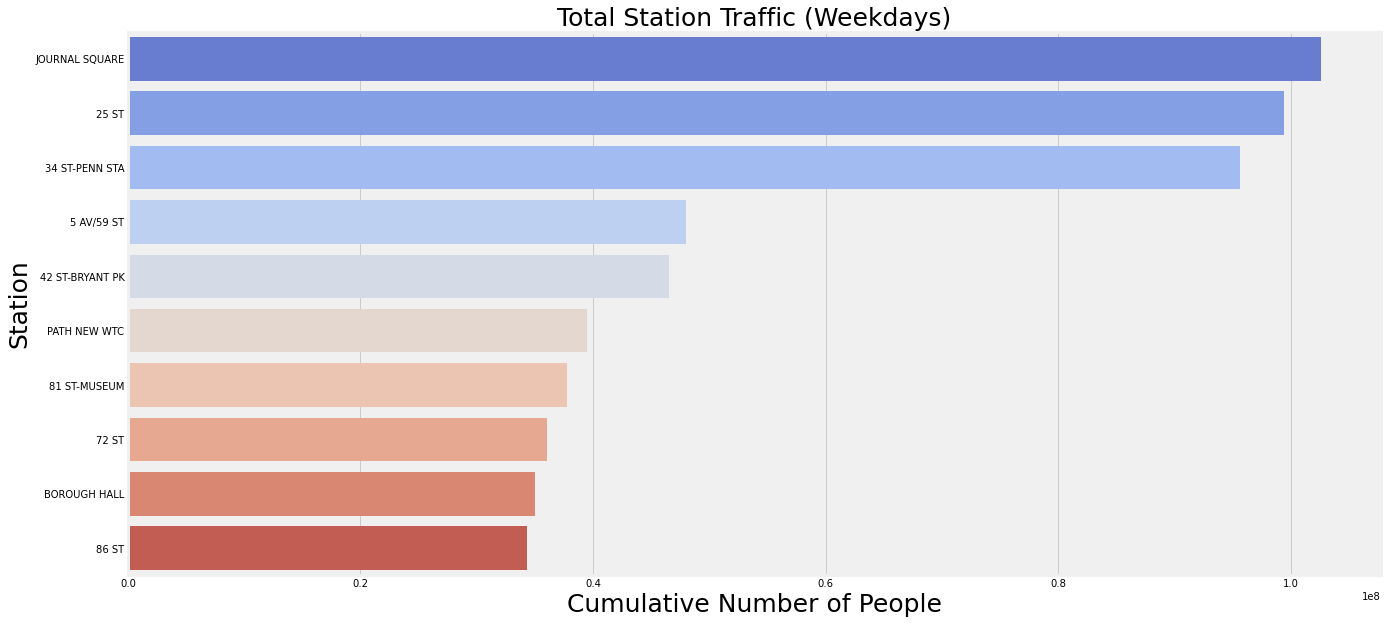

In [190]:
plt.figure(figsize=(20,10))
sns.barplot(x='turn_traffic', y='STATION', data=wkday_rank[:10], palette='coolwarm')
plt.title('Total Station Traffic (Weekdays)',size=25)
plt.ylabel('Station',size=25)
plt.xlabel('Cumulative Number of People',size=25);
plt.savefig('Total Station Traffic (Weekdays)')

In [191]:
df = MTA_daily[MTA_daily.STATION.isin(s)].groupby(['STATION', 'DATE', 'day_of_week'], as_index=False).turn_traffic.sum()
df['mean_d_traffic'] = df.groupby(['STATION','day_of_week']).turn_traffic.transform('mean')
df.drop(columns=['turn_traffic','DATE'], inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,STATION,day_of_week,mean_d_traffic
0,25 ST,5,4.940941e+03
1,25 ST,6,3.560235e+03
2,25 ST,0,5.453059e+03
3,25 ST,1,2.915239e+06
4,25 ST,2,1.461156e+06


#### Get Day name from Weekday int

In [192]:
wkday_dict = {'0':'Mon',
             '1':'Tues',
             '2':'Weds',
             '3':'Thurs',
             '4':'Fri',
             '5':'Sat',
             '6':'Sun'}
df.day_of_week = df.day_of_week.map(lambda x : str(x)).map(wkday_dict)

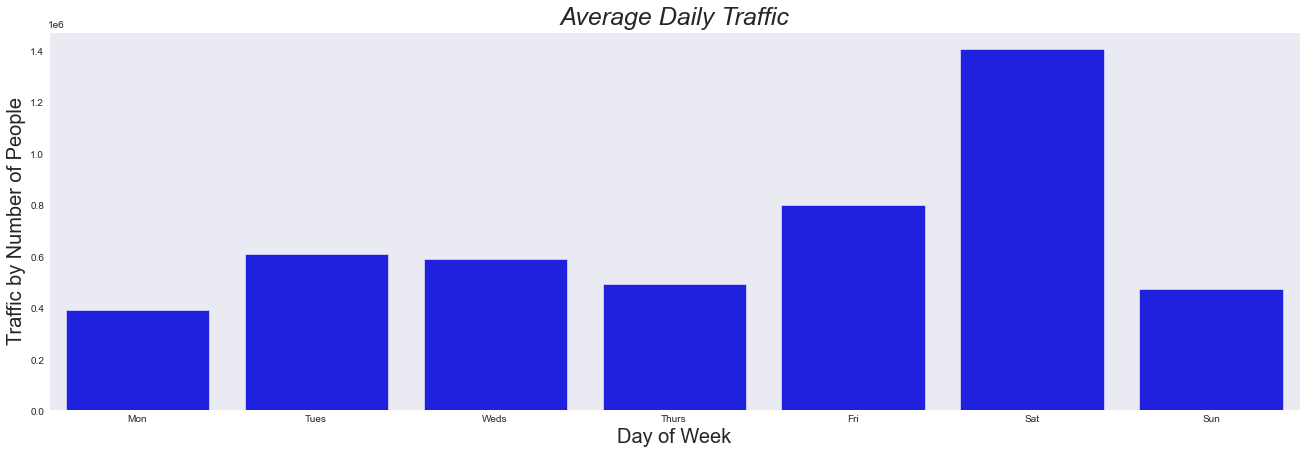

In [195]:
plt.figure(figsize=[20,7])
LIMIT = 9
sns.set_style('dark')
sns.barplot(x='day_of_week', 
            y='mean_d_traffic',  
            data=df, 
            order=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'], color='blue',
            ci=None)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Traffic by Number of People', fontsize=20)
plt.title('Average Daily Traffic', fontsize=25, fontstyle='oblique');
plt.savefig('Average Daily Traffic')